# Working with pandas DataFrames

Pandas (http://pandas.pydata.org) is great for data analysis, again we met it briefly in the software carpentry course, but it's worth revisiting. 

Note the book on that website - 'Python for data analysis', this is a useful text which much of this section was drawn from. 

We're also going to look at how we might use pandas to work with data read in with CIS.

In [2]:
import pandas as pd

## Series

A `Series` is essentially a container for series data (think time-series, but more general).

Let's create a time-series from the data we used for the last numpy example:

In [3]:
from datetime import datetime
s = pd.Series([0.13, 0.21, 0.15, 'NaN', 0.29, 0.09, 0.24, -10], dtype='f32',
                 index = [datetime(2015,11,16,15,41,23), datetime(2015,11,16,15,42,22), datetime(2015,11,16,15,43,25), datetime(2015,11,16,15,44,20), datetime(2015,11,16,15,45,22),
                          datetime(2015,11,16,15,46,23), datetime(2015,11,16,15,47,26), datetime(2015,11,16,15,48,21)])
print s
s.mean()


2015-11-16 15:41:23     0.13
2015-11-16 15:42:22     0.21
2015-11-16 15:43:25     0.15
2015-11-16 15:44:20      NaN
2015-11-16 15:45:22     0.29
2015-11-16 15:46:23     0.09
2015-11-16 15:47:26     0.24
2015-11-16 15:48:21   -10.00
dtype: float32


-1.2700001

As you can see, it's dealt with our missing value much more nicely - this is one of the nice things about Pandas.

We can get rid of the negative value easily as well:

In [4]:
s = s[s>0]
print s
s.mean()

2015-11-16 15:41:23    0.13
2015-11-16 15:42:22    0.21
2015-11-16 15:43:25    0.15
2015-11-16 15:45:22    0.29
2015-11-16 15:46:23    0.09
2015-11-16 15:47:26    0.24
dtype: float32


0.185

Note this also got rid of our NaN (as NaN comparisons are always negative)

Now, as you probably noticed, I added a lot of datetimes to this data which represent the timings of the measurements. Pandas uses these times as an `index` on the data, and gives us access to some very powerful tools.

For example, resampling our data to a minutely average is easy:

In [5]:
s.resample('5min', how='max')


2015-11-16 15:40:00    0.21
2015-11-16 15:45:00    0.29
Freq: 5T, dtype: float32

Another way of creating series is using dictionaries:

In [6]:
colours = pd.Series({'Blue': 42, 'Green': 12, 'Yellow': 37})
colours

Blue      42
Green     12
Yellow    37
dtype: int64

We can index Series just like numpy arrays, or using the named index:

In [7]:
print colours[1]
print colours[:-1]
print colours['Blue']

12
Blue     42
Green    12
dtype: int64
42


Or both:

In [8]:
print colours[1:]['Green'] 

12


Another nice benefit of the indices is in data allignment. So for example when performing operations on two series, Pandas will line up the indices first:

In [9]:
more_colours = pd.Series({'Blue': 16, 'Red': 22, 'Purple': 34, 'Green': 25,})

more_colours + colours

Blue      58
Green     37
Purple   NaN
Red      NaN
Yellow   NaN
dtype: float64

As you can see, if not both of the indices are present then Pandas will return NaNs.

Pandas uses numpy heavily underneath, so many of the numpy array operations work on Series as well:

In [10]:
colours.mean(), colours.max()

(30.333333333333332, 42)

## DataFrames

Data frames are essentially collections of Series, with a shared index. Each `column` of data is labelled and the whole frame can be pictured as a table, or spreadsheet of data.

In [11]:
df = pd.DataFrame({'First': colours, 'Second': more_colours})
print df

        First  Second
Blue       42      16
Green      12      25
Purple    NaN      34
Red       NaN      22
Yellow     37     NaN


And can be indexed by row, or index via the ix attribute:

In [12]:
print 'Column by index: ', df['First']

Column by index:  Blue      42
Green     12
Purple   NaN
Red      NaN
Yellow    37
Name: First, dtype: float64


In [13]:
print 'Column as attribute: ', df.first

Column as attribute:  <bound method DataFrame.first of         First  Second
Blue       42      16
Green      12      25
Purple    NaN      34
Red       NaN      22
Yellow     37     NaN>


In [14]:
print 'Row via ix:', df.ix['Blue']

Row via ix: First     42
Second    16
Name: Blue, dtype: float64


We can then apply many of the same numpy functions on this data, on a per column basis:

In [15]:
df.max()

First     42
Second    34
dtype: float64

In [16]:
df.sum()

First     91
Second    97
dtype: float64

## Using Pandas with CIS data

We can easily convert CIS data into pandas data to take advantage of this time-series functionality.

In [17]:
from cis import read_data
from cis.time_util import cis_standard_time_unit

BC_MASS = read_data("/Users/watson-parris/Local Data/gassp_data/Level_2/EUCAARI/SP2_EUCAARI_B*200805*.nc", "BC_MASS")

time = cis_standard_time_unit.num2date(BC_MASS.coord(standard_name='time').data)

cis_df = pd.DataFrame({'BC_Mass': BC_MASS.data, 'Lat': BC_MASS.lat.data, 'Lon': BC_MASS.lon.data}, index=time)
cis_df

,BC_Mass,Lat,Lon
2008-05-06 09:11:38,144.1440,48.031101,11.212400
2008-05-06 09:11:44,114.5720,48.026798,11.205300
2008-05-06 09:11:50,124.8760,48.022598,11.197500
2008-05-06 09:11:56,147.8370,48.018398,11.189200
2008-05-06 09:12:02,112.0370,48.014500,11.180400
2008-05-06 09:12:08,149.7000,48.010899,11.171200
2008-05-06 09:12:14,148.4620,48.007401,11.161600
2008-05-06 09:12:20,118.6980,48.004200,11.152000
2008-05-06 09:12:26,113.8810,48.001099,11.142200
2008-05-06 09:12:32,140.1160,47.998100,11.132500


In [18]:
# Now we can do cool Pandas stuff!
cis_df.ix[cis_df['BC_Mass'].argmin()]

BC_Mass     0.023154
Lat        57.583900
Lon        15.691700
Name: 2008-05-10 10:03:22, dtype: float64

## Exercise

In pairs, plot probability distributions (use kde) of the raw, minutely and hourly averaged black carbon mass

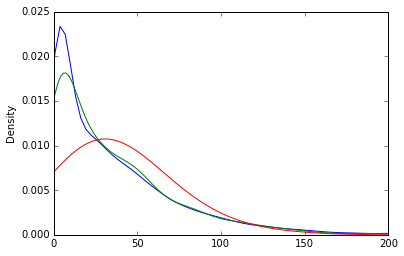

In [19]:
%matplotlib inline

cis_df['BC_Mass'].plot(kind='kde', xlim=[0,200])
cis_df['BC_Mass'].resample('1min', how='mean').plot(kind='kde')
cis_df['BC_Mass'].resample('60min', how='mean').plot(kind='kde')

# Extras

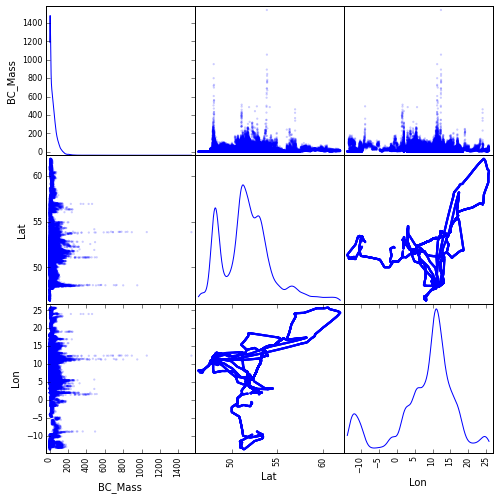

In [20]:
from pandas.tools.plotting import scatter_matrix
m = scatter_matrix(cis_df, alpha=0.2, figsize=(8, 8), diagonal='kde', edgecolors='none')